# STATS TABA SEM1

# Time Series for Yearly and Monthly data

# Implementation of seasonal naive for yearly observations

In [36]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [37]:
df = pd.read_csv(r'C:\Users\Admin\Downloads\TS Model Simple\nity18442004.csv')
df

x
0    8.5
1    8.3
2    9.7
3    8.9
4    8.5
..   ...
156  9.2
157  8.8
158  9.5
159  9.3
160  9.5

[161 rows x 1 columns]

In [38]:
# create a new column 'Year' with the range of years
# Add a new column with years
df['Year'] = range(1844, 1844 + len(df))

# rename the '0' column to 'Temperature'
df = df.rename(columns={'0': 'Temperature'})

# print the dataframe
print(df.head())

     x  Year
0  8.5  1844
1  8.3  1845
2  9.7  1846
3  8.9  1847
4  8.5  1848


In [39]:
df = df.rename(columns={'x': 'Temperature'})
df.head()

Temperature  Year
0          8.5  1844
1          8.3  1845
2          9.7  1846
3          8.9  1847
4          8.5  1848

In [40]:
import matplotlib.pyplot as plt
# Plot the temperature data over year
plt.plot(df['Year'], df['Temperature'])
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature over year')
plt.show()

# Time series Decomposition

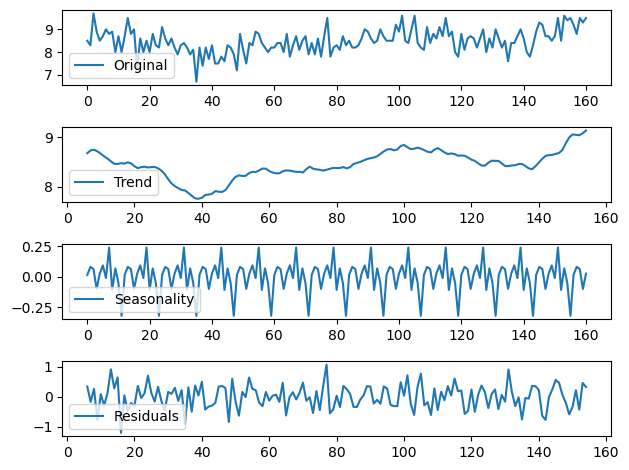

In [41]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
# Perform time series decomposition using multiplicative method
decomposition = seasonal_decompose(df['Temperature'], model='additive', period=12)

# Plot the decomposition
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df['Temperature'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonality,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Statoinarity check

In [42]:
from statsmodels.tsa.stattools import adfuller
# ADF test for stationarity
result = adfuller(df['Temperature'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.352376
p-value: 0.604883
Critical Values:
	1%: -3.474
	5%: -2.880
	10%: -2.577


# Simple time series mode


In [43]:
# Extract the seasonal component
seasonal = decomposition.seasonal

# Split the data into train and test set
train = df[df['Year'] <= 2003]
test = df[df['Year'] == 2004]

print(train)

     Temperature  Year
0            8.5  1844
1            8.3  1845
2            9.7  1846
3            8.9  1847
4            8.5  1848
..           ...   ...
155          9.5  1999
156          9.2  2000
157          8.8  2001
158          9.5  2002
159          9.3  2003

[160 rows x 2 columns]


In [44]:
print(test)

     Temperature  Year
160          9.5  2004


In [45]:
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [46]:
# Create the seasonal naive model and fit it to the training data
seasonal_naive_model = sm.tsa.UnobservedComponents(train['Temperature'], 'local level', seasonal=12)
fit_seasonal_naive = seasonal_naive_model.fit()

# Use the fitted model to forecast values for the test set
forecast_seasonal_naive = fit_seasonal_naive.forecast(steps=len(test))

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
# Calculate the performance metrics
mse_seasonal_naive = mean_squared_error(test['Temperature'], forecast_seasonal_naive)
mae_seasonal_naive = mean_absolute_error(test['Temperature'], forecast_seasonal_naive)
r2_seasonal_naive = r2_score(test['Temperature'], forecast_seasonal_naive)
rmse_seasonal_naive = mean_squared_error(test['Temperature'], forecast_seasonal_naive, squared=False)
mape_seasonal_naive = mean_absolute_percentage_error(test['Temperature'], forecast_seasonal_naive)
aic_seasonal_naive = fit_seasonal_naive.aic
bic_seasonal_naive = fit_seasonal_naive.bic

In [49]:
# Print the performance metrics
print('Seasonal Naive AIC:', aic_seasonal_naive)
print('Seasonal Naive BIC:', bic_seasonal_naive)
print('RMSE Seasonal Naive:', rmse_seasonal_naive)
print('Mean squared error:', mse_seasonal_naive)
print('Mean absolute error:', mae_seasonal_naive)
print('R Squared value:', r2_seasonal_naive)
print('Mean absolute percentage error:', mape_seasonal_naive)

Seasonal Naive AIC: 224.26744881087006
Seasonal Naive BIC: 233.2590856321624
RMSE Seasonal Naive: 0.33050158017293896
Mean squared error: 0.1092312944968096
Mean absolute error: 0.33050158017293896
R Squared value: nan
Mean absolute percentage error: 0.0347896400182041


In [50]:
test['Temperature']

160    9.5
Name: Temperature, dtype: float64

In [51]:
forecast_seasonal_naive

160    9.169498
dtype: float64

In [52]:
# Plot a bar graph comparing the test set values to the forecasted values
plt.figure(figsize=(4, 4))
bar_width = 0.35

plt.bar(test['Temperature'].index, test['Temperature'].values, width=bar_width, label='Test data')
plt.bar(forecast_seasonal_naive.index + bar_width*5, forecast_seasonal_naive.values, width=bar_width, label='Forecasted values (Seasonal Naive)')

plt.ylabel('Temperature')
plt.title('Year Temperature Forecast Comparison')

plt.legend()
plt.show()

# Implementation of seasonal naive for monthly data

In [54]:
import pandas as pd
from datetime import datetime

# Create a date range
date_range = pd.date_range(start='1/1/1844', end='12/1/2004', freq='MS')

# Load the data
dfm = pd.read_csv(r'C:\Users\Admin\Downloads\TS Model Simple\nitm18442004.csv')

# Convert non-numeric values to NaN in the 'Temperature' column and then remove these rows
dfm['x'] = pd.to_numeric(dfm['x'], errors='coerce')
dfm = dfm.dropna()

# Create a new DataFrame with date and temperature columns
dfm = pd.DataFrame({'x': dfm['x'], 'Year': date_range[:len(dfm)]})

# Reorder the columns
dfm = dfm[['Year', 'x']]
dfm


Year     x
0    1844-01-01   4.5
1    1844-02-01   2.4
2    1844-03-01   4.8
3    1844-04-01   9.1
4    1844-05-01  10.9
...         ...   ...
1927 2004-08-01  15.4
1928 2004-09-01  13.2
1929 2004-10-01   8.6
1930 2004-11-01   8.2
1931 2004-12-01   6.2

[1932 rows x 2 columns]

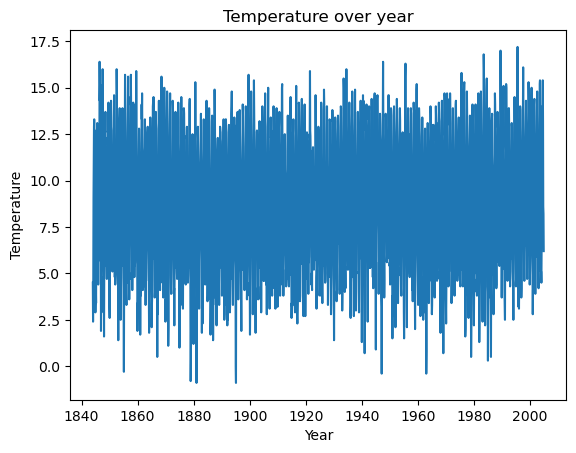

In [55]:
import matplotlib.pyplot as plt
# Plot the temperature data over year
plt.plot(dfm['Year'], dfm['x'])
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature over year')
plt.show()

# Time series Decomposition

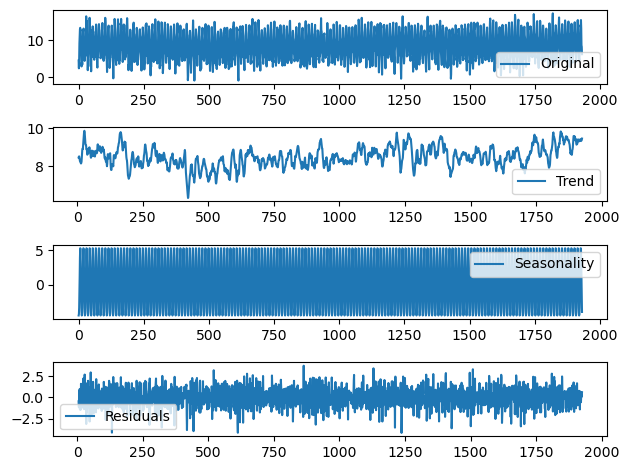

In [60]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
# Perform time series decomposition using additive method
decomposition = seasonal_decompose(dfm['x'], model='additive', period=12)

# Plot the decomposition
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(dfm['x'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonality,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [61]:
from statsmodels.tsa.stattools import adfuller
# ADF test for stationarity
result = adfuller(dfm['x'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.000624
p-value: 0.000022
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


# Simple time series mode

In [62]:
# Extract the seasonal component
seasonal = decomposition.seasonal

# Split the data into train and test set
train = dfm[dfm['Year'].dt.year <= 2003]
test = dfm[dfm['Year'].dt.year == 2004]


print(train)


           Year     x
0    1844-01-01   4.5
1    1844-02-01   2.4
2    1844-03-01   4.8
3    1844-04-01   9.1
4    1844-05-01  10.9
...         ...   ...
1915 2003-08-01  15.4
1916 2003-09-01  12.9
1917 2003-10-01   8.5
1918 2003-11-01   7.6
1919 2003-12-01   5.1

[1920 rows x 2 columns]


In [63]:
print(test)

           Year     x
1920 2004-01-01   5.1
1921 2004-02-01   4.5
1922 2004-03-01   6.2
1923 2004-04-01   8.3
1924 2004-05-01  10.7
1925 2004-06-01  14.0
1926 2004-07-01  13.6
1927 2004-08-01  15.4
1928 2004-09-01  13.2
1929 2004-10-01   8.6
1930 2004-11-01   8.2
1931 2004-12-01   6.2


In [64]:
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [65]:
# Create the seasonal naive model and fit it to the training data
seasonal_naive_model = sm.tsa.UnobservedComponents(train['x'], 'local level', seasonal=12)
fit_seasonal_naive = seasonal_naive_model.fit()

# Use the fitted model to forecast values for the test set
forecast_seasonal_naive = fit_seasonal_naive.forecast(steps=len(test))

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
# Calculate the performance metrics
mse_seasonal_naive = mean_squared_error(test['x'], forecast_seasonal_naive)
mae_seasonal_naive = mean_absolute_error(test['x'], forecast_seasonal_naive)
r2_seasonal_naive = r2_score(test['x'], forecast_seasonal_naive)
rmse_seasonal_naive = mean_squared_error(test['x'], forecast_seasonal_naive, squared=False)
mape_seasonal_naive = mean_absolute_percentage_error(test['x'], forecast_seasonal_naive)
aic_seasonal_naive = fit_seasonal_naive.aic
bic_seasonal_naive = fit_seasonal_naive.bic

In [67]:
# Print the performance metrics
print('Seasonal Naive AIC:', aic_seasonal_naive)
print('Seasonal Naive BIC:', bic_seasonal_naive)
print('RMSE Seasonal Naive:', rmse_seasonal_naive)
print('Mean squared error:', mse_seasonal_naive)
print('Mean absolute error:', mae_seasonal_naive)
print('R Squared value:', r2_seasonal_naive)
print('Mean absolute percentage error:', mape_seasonal_naive)

Seasonal Naive AIC: 6209.693114369455
Seasonal Naive BIC: 6226.35454692548
RMSE Seasonal Naive: 0.8077013653640941
Mean squared error: 0.6523814956110218
Mean absolute error: 0.7050385676486816
R Squared value: 0.9501618414353689
Mean absolute percentage error: 0.07925294567937272


In [68]:
test['x']

1920     5.1
1921     4.5
1922     6.2
1923     8.3
1924    10.7
1925    14.0
1926    13.6
1927    15.4
1928    13.2
1929     8.6
1930     8.2
1931     6.2
Name: x, dtype: float64

In [69]:
forecast_seasonal_naive

1920     4.753143
1921     4.879782
1922     6.039156
1923     7.858008
1924    10.511823
1925    13.094767
1926    14.598520
1927    14.509377
1928    12.602827
1929     9.882261
1930     6.817805
1931     5.313192
Name: predicted_mean, dtype: float64

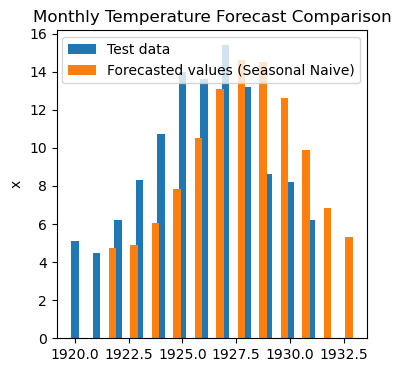

In [71]:
# Plot a bar graph comparing the test set values to the forecasted values
plt.figure(figsize=(4, 4))
bar_width = 0.35

plt.bar(test['x'].index, test['x'].values, width=bar_width, label='Test data')
plt.bar(forecast_seasonal_naive.index + bar_width*5, forecast_seasonal_naive.values, width=bar_width, label='Forecasted values (Seasonal Naive)')

plt.ylabel('x')
plt.title('Monthly Temperature Forecast Comparison')

plt.legend()
plt.show()